In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from visual_behavior import database as db
import visual_behavior.utilities as vbu
import visual_behavior.plotting as vbp

from dro.modules import eye_tracking as et

from multiprocessing import Pool

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline

In [3]:
manifest_path = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\visual_behavior_pilot_analysis\visual_behavior_pilot_manuscript_resubmission\visual_behavior_data_manifest.csv'
manifest_path = manifest_path.replace('\\','/')

manifest = pd.read_csv(manifest_path)

## add ophys session ID to manifest
it makes LIMS queries easier

In [4]:
def ophys_experiment_id_to_ophys_session_id(oeid):
    return db.convert_id({'ophys_experiment_id':oeid},'ophys_session_id')
manifest['ophys_session_id'] = manifest['experiment_id'].map(lambda oeid:ophys_experiment_id_to_ophys_session_id(oeid))

## get the path to the ellipse fit for every session:

In [5]:
def get_wkf_path(osid,name):
    wkf = db.get_well_known_files(osid).set_index('name')
    if name in wkf.index:
        return os.path.join(wkf.loc[name]['storage_directory'],wkf.loc[name]['filename'])
    else:
        return None

manifest['eye_tracking_ellipse_path'] = manifest['ophys_session_id'].map(lambda osid:get_wkf_path(osid, 'EyeTracking Ellipses'))

## It looks like a handful of sessions are missing eyetracking data

In [6]:
missing_sessions = manifest[pd.isnull(manifest['eye_tracking_ellipse_path'])]
print('{} sessions do not appear to have eye tracking data'.format(len(missing_sessions)))
missing_sessions

13 sessions do not appear to have eye tracking data


,experiment_id,experiment_container_id,targeted_structure,imaging_depth,cre_line,reporter_line,full_genotype,session_type,donor_id,specimen_id,experiment_date,ophys_session_id,eye_tracking_ellipse_path
3,645362806,644919226,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_D,329071,596175193,10/30/2017 11:41,645326094,None
8,639253368,639001089,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,334310,599659785,9/28/2017 14:14,639241139,None
22,698244621,695444116,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_C,363887,652073919,5/15/2018 13:56,698209705,None
23,698724265,695444116,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_D,363887,652073919,5/16/2018 14:41,698666875,None
35,714126693,712038821,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_D,373723,660049533,6/25/2018 11:10,713780327,None
43,737471012,729705760,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_D,382897,679238912,8/15/2018 11:45,737194890,None
46,716337289,715094648,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_C,384942,687987489,6/29/2018 14:27,716250979,None
52,719321260,719538773,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,385255,685152008,7/12/2018 10:27,719072159,None
54,723748162,719538773,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_C,385255,685152008,7/23/2018 11:18,723446101,None
60,745353761,745302137,VISal,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_A,397561,710285861,9/4/2018 11:37,745302137,None


In [7]:
len(manifest)

101

In [8]:
manifest.sample(5)

,experiment_id,experiment_container_id,targeted_structure,imaging_depth,cre_line,reporter_line,full_genotype,session_type,donor_id,specimen_id,experiment_date,ophys_session_id,eye_tracking_ellipse_path
27,702723649,700821114,VISal,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_D,363887,652073919,5/25/2018 14:51,702647224,/allen/programs/braintv/production/neuralcodin...
66,756715598,754511300,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_C,401625,717693518,9/21/2018 12:57,756565197,/allen/programs/braintv/production/visualbehav...
65,754943841,754511300,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_B,401625,717693518,9/18/2018 13:10,754850425,/allen/programs/braintv/production/visualbehav...
72,766779984,766725279,VISp,175,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_A,406581,729701309,10/22/2018 13:45,766725279,/allen/programs/braintv/production/visualbehav...
80,771427955,771235817,VISal,100,Vip-IRES-Cre,Ai148,Vip-IRES-Cre;Ai148,behavior_session_A,407141,738609005,10/31/2018 13:59,771235817,/allen/programs/braintv/production/visualbehav...


## use the EyeTrackingData class to open one session at random

In [9]:
osid = manifest[pd.notnull(manifest['eye_tracking_ellipse_path'])].sample(random_state=0)['ophys_session_id'].iloc[0]
ed = vbu.EyeTrackingData(int(osid),data_source='filesystem')


/home/dougo/Code/visual_behavior_analysis/visual_behavior/utilities.py:403: UserWarning: no matching sync line for eye
  warnings.warn('no matching sync line for {}'.format(movie_label))
/home/dougo/Code/visual_behavior_analysis/visual_behavior/utilities.py:403: UserWarning: no matching sync line for behavior
  warnings.warn('no matching sync line for {}'.format(movie_label))


#### look at 100 frames spread evenly over the session
It looks like there are a fair number of frames with missing fits, and also occasional incorrect fits (e.g. frames 74903 and 84266).  
Also, it looks like the mouse disappeared for a bit early on?  
If you use the 'blink_corrected_area' column, that will interpolate over the missing data, but I haven't yet implemented a reliable algorithm for removing the spurious fits. We'll need to be careful with filtering so we don't remove potentially interesting oscillations.

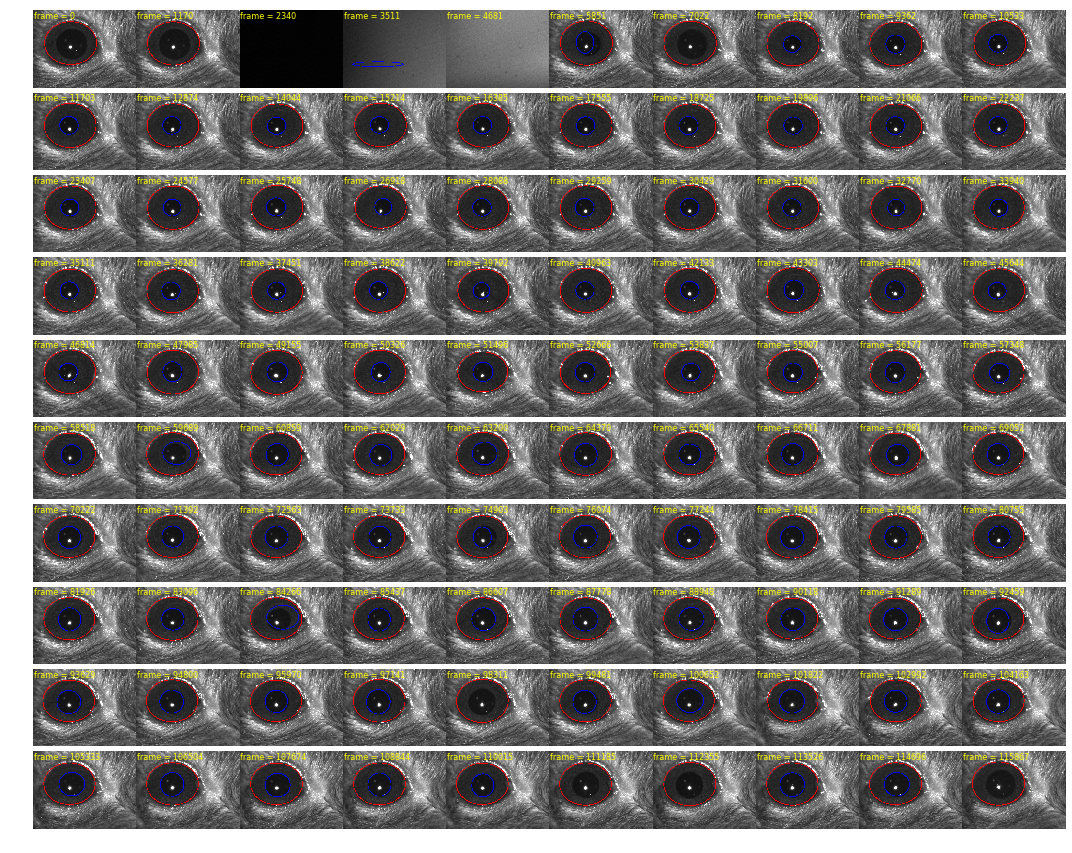

In [10]:
def plot_sample_images(ed,ax):
    '''requires a 10x10 array of axes'''
    for ii,frame in enumerate(np.linspace(0,len(ed.ellipse_fits['pupil'])-1,100)):
        frame = int(frame)
        ax.flatten()[ii].imshow(ed.get_annotated_frame(frame))
        ax.flatten()[ii].axis('off')
        ax.flatten()[ii].text(5,5,'frame = {}'.format(frame),fontsize=8,va='top',color='yellow')
        
fig,ax = plt.subplots(10,10,figsize=(15,12))
plot_sample_images(ed,ax)
fig.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)

## Here's the pupil fit dataframe:

In [11]:
ed.ellipse_fits['pupil'].sample(10)

,center_x,center_y,height,phi,width,area,frame,likely_blinks,blink_corrected_center_x,blink_corrected_center_y,blink_corrected_height,blink_corrected_phi,blink_corrected_width,blink_corrected_area
20468,225.485926,206.695639,54.328524,-0.325556,57.726627,10468.928677,20468,False,225.485926,206.695639,54.328524,-0.325556,57.726627,10468.928677
36111,218.404139,204.726955,55.709631,-0.215547,56.975210,10198.158185,36111,False,218.404139,204.726955,55.709631,-0.215547,56.975210,10198.158185
108543,NaN,NaN,NaN,NaN,NaN,NaN,108543,True,220.972613,204.881689,70.627319,0.126826,68.117489,16076.902319
51628,225.685516,197.206485,51.925740,-0.573978,54.433693,9308.623815,51628,False,225.685516,197.206485,51.925740,-0.573978,54.433693,9308.623815
38661,219.304600,207.007492,54.264863,-0.191541,56.211227,9926.496642,38661,False,219.304600,207.007492,54.264863,-0.191541,56.211227,9926.496642
100393,219.243915,207.621290,71.608310,0.168428,67.681643,16109.301751,100393,True,227.408699,203.347531,74.773606,-0.263872,75.477042,19158.832358
86193,223.488530,203.146112,69.100531,-0.128188,70.771223,15734.874230,86193,False,223.488530,203.146112,69.100531,-0.128188,70.771223,15734.874230
114313,NaN,NaN,NaN,NaN,NaN,NaN,114313,True,220.843918,207.563107,78.573218,0.338520,74.186138,19398.104221
44979,218.622600,207.090523,59.962470,0.463070,59.282390,11295.589617,44979,False,218.622600,207.090523,59.962470,0.463070,59.282390,11295.589617
56300,219.838605,204.694044,59.830816,0.129016,60.459875,11483.766830,56300,False,219.838605,204.694044,59.830816,0.129016,60.459875,11483.766830


## Here's the area vs. frame plot for the full session. the 'blink_corrected_area' column is still pretty noisy, so som further filtering will be necessary
Note that I'm capping the plot at 25000 pixels^2. Anything bigger is unreasonable.

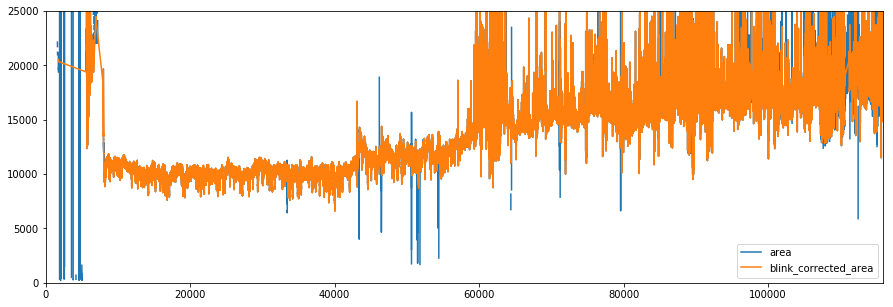

In [12]:
def plot_timeseries(ed,ax):
    cols_to_plot = ['area','blink_corrected_area']
    ed.ellipse_fits['pupil'][cols_to_plot].plot(ax=ax)
    ax.set_ylim(0,25000)
fig,ax=plt.subplots(figsize=(15,5))
plot_timeseries(ed,ax)

## make the above summary plots and save the pupil dataframe for every session
use multiprocessing so it doesn't take hours!

In [17]:
def make_combined_plot(ed):
    fig = plt.figure(figsize=(15,15))
    ax_ts = vbp.placeAxesOnGrid(fig,yspan=(0,0.1))

    frames_yspan = (0.2,1)
    total_frames_yspan = frames_yspan[1]-frames_yspan[0]

    ax_frames = []
    for row in np.arange(10):
        for col in np.arange(10):
            ax_frames.append(vbp.placeAxesOnGrid(fig,xspan=(row*0.1,(row+1)*0.1),yspan=(col*(total_frames_yspan/10)+frames_yspan[0],(col+1)*(total_frames_yspan/10)+frames_yspan[0])))
    ax_frames = np.array(ax_frames)
    plot_timeseries(ed,ax_ts)
    plot_sample_images(ed,ax_frames)
    fig.suptitle('ophys_session_id = {}'.format(ed.ophys_session_id))
    
    return fig,ax

def save_plot_and_df(osid,savepath = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_pilot_eyetracking'):

    # make plots and save the figure
    ed = vbu.EyeTrackingData(int(osid),data_source='filesystem')
    try:
        fig,ax = make_combined_plot(ed)
        fig.savefig(os.path.join(savepath,'figures','{}.png'.format(osid)),dpi=300)
    except:
        print('failed to save figure for osid {}'.format(osid))
    
    # save pupil dataframe
    try:
        ed.ellipse_fits['pupil'].to_csv(os.path.join(savepath,'pupil_tracking_df_osid={}.csv'.format(osid)),index=False)
    except:
        print('failed to save dataframe for osid {}'.format(osid))

In [18]:
## every session will return the warning about sync alignment. Suppress warnings from here out
import warnings
warnings.filterwarnings('ignore')

In [19]:
osids = manifest[pd.notnull(manifest['eye_tracking_ellipse_path'])]['ophys_session_id'].unique()
with Pool(8) as pool:
    pool.map(save_plot_and_df ,osids)